<a href="https://colab.research.google.com/github/mosihan/UOB--Three-models-of-handwritten-digit-recognition/blob/main/SVM_CV_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

svm = svm.SVC()
parameters = {'C':np.arange (0,10,0.5)}
#parameters = {'C':10. ** np.arange(-5,2), 'gamma':['scale','auto']}

print("grid search")
grid = GridSearchCV(svm, parameters, cv=3, verbose=3,scoring='accuracy',n_jobs=-1)
grid.fit(X_train, y_train)
print("predicting")
print("score: ", grid.score(X_test, y_test)) 
print(grid.best_estimator_) 

end = datetime.datetime.now()
print (end-start)

grid search
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 89.3min


(0.1, 2.0, 0.97, 0.98)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


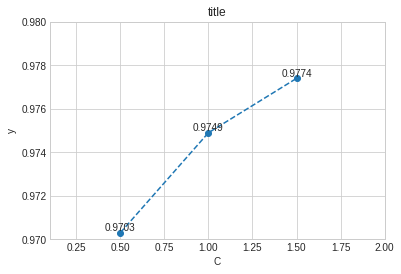

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

yy=np.around(grid.cv_results_['mean_test_score'], decimals=4)

plt.plot(np.arange (0,2,0.5),yy,marker='o',linestyle='dashed')

for a, b in zip(np.arange (0,2,0.5),yy):
  plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
  
plt.xlabel('C')
plt.ylabel('y')
plt.title('title')

#axis[xmin, xmax, ymin, ymax]，
plt.axis([0.1, 2, 0.97, 0.98])

In [ ]:
from sklearn import metrics
best_model=grid.best_estimator_
y_test_pred=best_model.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
print('Training accuracy = {0}%'.format(np.round(best_model.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(best_model.score(X_test, y_test) * 100, 2)))

Training accuracy = 99.36%
Test accuracy = 98.21%


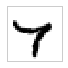

this should be 7
SVM model think this is 4


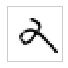

this should be 2
SVM model think this is 9


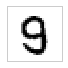

this should be 9
SVM model think this is 8


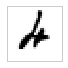

this should be 4
SVM model think this is 2


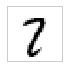

this should be 2
SVM model think this is 7


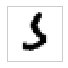

this should be 5
SVM model think this is 3


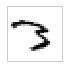

this should be 3
SVM model think this is 7


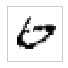

this should be 6
SVM model think this is 0


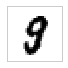

this should be 9
SVM model think this is 8


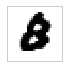

this should be 8
SVM model think this is 2


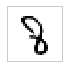

this should be 8
SVM model think this is 3


In [ ]:
# show error classiclassification 
import matplotlib

def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((28, 28)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))

n=0
for index in np.arange(0,y_test_pred.shape[0]):
  if y_test_pred[index]!=y_test[index]:
    pick_one=index
    plot_an_image(X_test[pick_one, :])
    plt.show()
    print('this should be {}'.format(y_test[pick_one]))
    print('SVM model think this is {}'.format(y_test_pred[pick_one]))
    n=n+1
    if n > 10:
      break


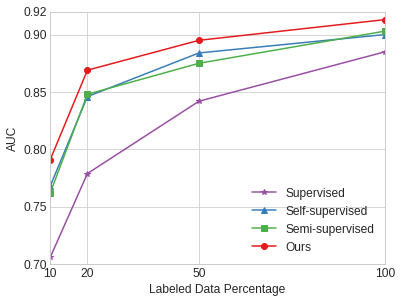

In [ ]:
'''
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
pyplot.figure(figsize=(6, 4.5))
plt.style.use( 'seaborn-whitegrid') 
palette = pyplot.get_cmap('Set1')
#plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams.update({'font.size': 12}) 
 
x = [10, 20, 50, 100]
y_Supervised = [0.706, 0.779, 0.842, 0.885]
y_Self = [0.768, 0.846, 0.884, 0.9]
y_Semi = [0.762, 0.848, 0.875, 0.903]
y_ours = [0.791, 0.869, 0.895, 0.913]

plt.xlim(10, 100) 
plt.ylim(0.7, 0.92)  
 
 
#plt.plot(x, y_Supervised, marker='o', mec='r',label='Supervised')
plt.plot(x, y_Supervised, color=palette(3), marker='*', label='Supervised')
plt.plot(x, y_Self, color=palette(1), marker='^', label='Self-supervised')
plt.plot(x, y_Semi, color=palette(2), marker='s', label='Semi-supervised')
plt.plot(x, y_ours, color=palette(0), marker='o', label='Ours')

plt.legend()  # 让图例生效
#plt.xticks(x, names, rotation=1)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Labeled Data Percentage') #X轴标签
plt.ylabel("AUC") #Y轴标签
pyplot.yticks([0.70, 0.75,0.80,0.85,0.90,0.92])
pyplot.xticks([10, 20, 50, 100])
#plt.title("A simple plot") #标题
plt.savefig('Fig.png',dpi = 300)